# Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300) 

# Perceptrons

In [2]:
# Perceptrons are one of the simplest Artificial Neural Network architectures.
# Based on the threshold logic unit(TLU), the inputs and outputs are numbers and each input connection is associated with a weight.
# The TLU computes a weighted sum of its inputs, then applies a step function to that sum and outputs the result.
# A single TLU can be used for simple linear binary classification.

# A perceptron is simply composed of a single layer of TLUs, with each neuron connected to all the inputs.

# Scikit-Learn provides a Perceptron class that implements a single TLU network. We will use it on the Iris dataset:



import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])



In [3]:
y_pred

array([1])

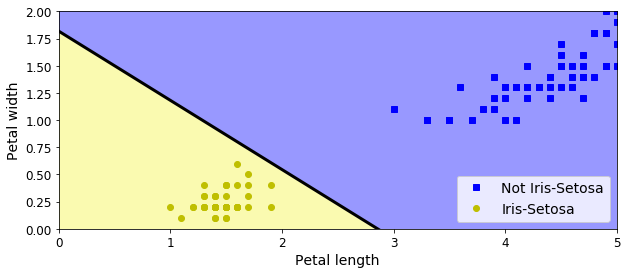

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.savefig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
# Activation functions are used to train multilayer perceptrons.
# Multilayer Perceptrons are trained when the system's output is compared to the actual data. The error is calculated and then the backpropogation algorithm goes backward and changes the weights of each particular Threshold Logic Unit in an attempt to reduce the error.
# The last step of the backpropogation algorithm is a Gradient Descent step on all the connection weights in the the network, using the error gradients measured earlier.

# In order for this algorithm to work properly, instead of a step function that is normally used in the MLP's architecture, different functions were used because they were easily differentiated:
    # The hyperbolic tangent function
    # ReLU function
    # Logistic Function
    
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)


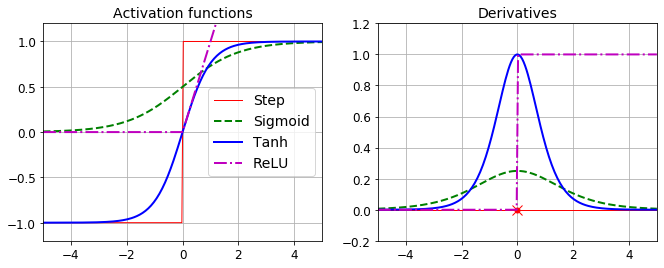

In [6]:
# The following code displays plots of the activation functions and their derivatives:



z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.savefig("activation_functions_plot")
plt.show()

In [7]:
# What the hell is this code displaying?



def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)



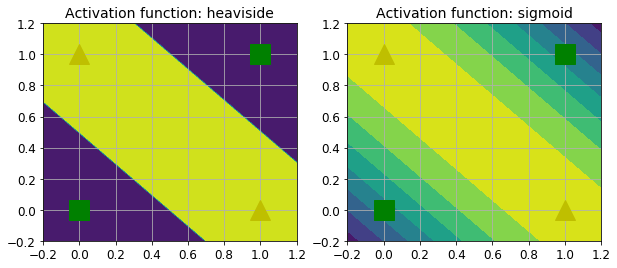

In [8]:
# What the hell is this code displaying??

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Training an MLP with Tensorflow's High-Level API

In [9]:
# The simplest way to train an MLP with Tensorflow is to use the high-level API TF.learn, which offers a Scikit-Learn compatible API
# API stands for application program interface. It is a set of routines, protocols, and tools for building software applications. Basically, it specifies how software components should interact.

# The DNNClassifier class makes it fairly easy to train a deep neural network with  any number of hidden layers, and a softmax output layers to output estimated class probabilities.

# For example, the following code trains a DNN for classification with two hidden layers(one with 300 neurons and the other with 100) and a softmax output layer with 10 neurons:

import tensorflow as tf

/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lam/ml/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:472: FutureWarnin

In [10]:

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]



In [11]:
# The following code trains a DNN for classification with two hidden layers (one with 300 neurons, and the other with 100 neurons) and a softmax output layer with 10 neurons:

feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)


# This code first creates a set of real valued columns from the training set. Then we create the DNNClassifier, and we wrap it in a Scikit-Learn compatiblity helper. 
# Finally, we run 40,000 training iterations using batches of 50 instances.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmprqodwu20', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbbc80e1ba8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmprqodwu20/model.ckpt.
INFO:tensorflow:loss = 119.27997, step = 1
INFO:tensorflow:global_step/sec: 334.855
INFO:tensorflow:loss = 29.502712, step = 101 (0.299 sec)
INFO:tensorflow:global_step/sec: 314.098
INFO:tensorflow:loss = 6.0190506, step = 201 (0.318 sec)
INFO:tensorflow:global_step/sec: 317.503
INFO:tensorflow:loss =

INFO:tensorflow:global_step/sec: 315.872
INFO:tensorflow:loss = 0.5134225, step = 7601 (0.316 sec)
INFO:tensorflow:global_step/sec: 317.473
INFO:tensorflow:loss = 0.83792716, step = 7701 (0.315 sec)
INFO:tensorflow:global_step/sec: 315.654
INFO:tensorflow:loss = 0.21771207, step = 7801 (0.316 sec)
INFO:tensorflow:global_step/sec: 313.887
INFO:tensorflow:loss = 0.71748465, step = 7901 (0.319 sec)
INFO:tensorflow:global_step/sec: 318.851
INFO:tensorflow:loss = 0.23245543, step = 8001 (0.314 sec)
INFO:tensorflow:global_step/sec: 318.758
INFO:tensorflow:loss = 0.8251261, step = 8101 (0.314 sec)
INFO:tensorflow:global_step/sec: 317.92
INFO:tensorflow:loss = 0.20674789, step = 8201 (0.315 sec)
INFO:tensorflow:global_step/sec: 320.423
INFO:tensorflow:loss = 0.28417942, step = 8301 (0.312 sec)
INFO:tensorflow:global_step/sec: 317.38
INFO:tensorflow:loss = 0.53244644, step = 8401 (0.315 sec)
INFO:tensorflow:global_step/sec: 319.151
INFO:tensorflow:loss = 7.541351, step = 8501 (0.313 sec)
INFO:t

INFO:tensorflow:global_step/sec: 317.973
INFO:tensorflow:loss = 0.14734179, step = 15801 (0.315 sec)
INFO:tensorflow:global_step/sec: 322.836
INFO:tensorflow:loss = 0.29589045, step = 15901 (0.310 sec)
INFO:tensorflow:global_step/sec: 316.467
INFO:tensorflow:loss = 0.022915605, step = 16001 (0.316 sec)
INFO:tensorflow:global_step/sec: 316.423
INFO:tensorflow:loss = 0.032870572, step = 16101 (0.316 sec)
INFO:tensorflow:global_step/sec: 318.142
INFO:tensorflow:loss = 0.14700148, step = 16201 (0.315 sec)
INFO:tensorflow:global_step/sec: 319.13
INFO:tensorflow:loss = 0.11742509, step = 16301 (0.313 sec)
INFO:tensorflow:global_step/sec: 314.992
INFO:tensorflow:loss = 0.120645, step = 16401 (0.317 sec)
INFO:tensorflow:global_step/sec: 319.406
INFO:tensorflow:loss = 0.20408137, step = 16501 (0.313 sec)
INFO:tensorflow:global_step/sec: 319.966
INFO:tensorflow:loss = 0.8796848, step = 16601 (0.312 sec)
INFO:tensorflow:global_step/sec: 321.037
INFO:tensorflow:loss = 1.8523734, step = 16701 (0.31

INFO:tensorflow:loss = 0.1192923, step = 23901 (0.295 sec)
INFO:tensorflow:global_step/sec: 347.962
INFO:tensorflow:loss = 0.4320667, step = 24001 (0.287 sec)
INFO:tensorflow:global_step/sec: 344.908
INFO:tensorflow:loss = 0.0042193052, step = 24101 (0.290 sec)
INFO:tensorflow:global_step/sec: 342.113
INFO:tensorflow:loss = 0.019306809, step = 24201 (0.292 sec)
INFO:tensorflow:global_step/sec: 344.875
INFO:tensorflow:loss = 0.026209932, step = 24301 (0.290 sec)
INFO:tensorflow:global_step/sec: 343.751
INFO:tensorflow:loss = 0.04562173, step = 24401 (0.291 sec)
INFO:tensorflow:global_step/sec: 345.229
INFO:tensorflow:loss = 0.077342845, step = 24501 (0.290 sec)
INFO:tensorflow:global_step/sec: 341.429
INFO:tensorflow:loss = 0.043049216, step = 24601 (0.293 sec)
INFO:tensorflow:global_step/sec: 346.886
INFO:tensorflow:loss = 0.060469724, step = 24701 (0.288 sec)
INFO:tensorflow:global_step/sec: 347.733
INFO:tensorflow:loss = 0.0710018, step = 24801 (0.288 sec)
INFO:tensorflow:global_step

INFO:tensorflow:loss = 0.0043816105, step = 32001 (0.288 sec)
INFO:tensorflow:global_step/sec: 340.43
INFO:tensorflow:loss = 0.051732983, step = 32101 (0.294 sec)
INFO:tensorflow:global_step/sec: 338.911
INFO:tensorflow:loss = 0.009655814, step = 32201 (0.295 sec)
INFO:tensorflow:global_step/sec: 343.285
INFO:tensorflow:loss = 0.03868348, step = 32301 (0.291 sec)
INFO:tensorflow:global_step/sec: 342.98
INFO:tensorflow:loss = 0.053342953, step = 32401 (0.292 sec)
INFO:tensorflow:global_step/sec: 343.387
INFO:tensorflow:loss = 0.008097459, step = 32501 (0.291 sec)
INFO:tensorflow:global_step/sec: 344.489
INFO:tensorflow:loss = 0.02756847, step = 32601 (0.290 sec)
INFO:tensorflow:global_step/sec: 345.732
INFO:tensorflow:loss = 0.053025633, step = 32701 (0.289 sec)
INFO:tensorflow:global_step/sec: 342.01
INFO:tensorflow:loss = 0.17419866, step = 32801 (0.293 sec)
INFO:tensorflow:global_step/sec: 344.129
INFO:tensorflow:loss = 0.008816419, step = 32901 (0.290 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:loss = 0.06938525, step = 40101 (0.291 sec)
INFO:tensorflow:global_step/sec: 345.704
INFO:tensorflow:loss = 0.035856128, step = 40201 (0.289 sec)
INFO:tensorflow:global_step/sec: 346.308
INFO:tensorflow:loss = 0.012709527, step = 40301 (0.289 sec)
INFO:tensorflow:global_step/sec: 347.925
INFO:tensorflow:loss = 0.012225, step = 40401 (0.288 sec)
INFO:tensorflow:global_step/sec: 345.818
INFO:tensorflow:loss = 0.012499242, step = 40501 (0.289 sec)
INFO:tensorflow:global_step/sec: 348.268
INFO:tensorflow:loss = 0.057161793, step = 40601 (0.287 sec)
INFO:tensorflow:global_step/sec: 341.643
INFO:tensorflow:loss = 0.010607066, step = 40701 (0.293 sec)
INFO:tensorflow:global_step/sec: 344.478
INFO:tensorflow:loss = 0.0096598845, step = 40801 (0.291 sec)
INFO:tensorflow:global_step/sec: 345.088
INFO:tensorflow:loss = 0.049960837, step = 40901 (0.289 sec)
INFO:tensorflow:global_step/sec: 343.297
INFO:tensorflow:loss = 0.0036604844, step = 41001 (0.291 sec)
INFO:tensorflow:global_

In [12]:
# If we run this code on the MNIST dataset, we will get a model that acheves around 98.2% accuracy on the test set:

test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Starting evaluation at 2019-11-27-19:36:26
INFO:tensorflow:Restoring parameters from /tmp/tmprqodwu20/model.ckpt-44000
INFO:tensorflow:Finished evaluation at 2019-11-27-19:36:27
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9784, average_loss = 0.10710878, global_step = 44000, loss = 13.558073


In [13]:
eval_results

{'accuracy': 0.9784,
 'average_loss': 0.10710878,
 'loss': 13.558073,
 'global_step': 44000}

In [14]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Restoring parameters from /tmp/tmprqodwu20/model.ckpt-44000


{'logits': array([ -6.7744145,   4.6068625,   3.1998315,   8.792587 ,  -9.845396 ,
         -7.6701236, -17.501505 ,  21.095896 ,  -1.0065271,   4.1850605],
       dtype=float32),
 'probabilities': array([7.8718390e-13, 6.9008415e-08, 1.6898021e-08, 4.5366892e-06,
        3.6506121e-14, 3.2142103e-13, 1.7272684e-17, 9.9999535e-01,
        2.5178959e-10, 4.5260105e-08], dtype=float32),
 'class_ids': array([7]),
 'classes': array([b'7'], dtype=object)}

# Training a DNN Using Plain TensorFlow

In [15]:
# If you want more control over the architecture of the network, you may prefer to use TensorFlow's lower-level Python API.
# In this section we will build the same model as before using this API, and we will implement Mini-batch Gradient Descent to train it on the MNIST dataset.

# The first step is the construction phase where we build the graph.
# We need to import the TensorFlow library and specify the number of inputs and outputs, and set the number of hidden neurons in each layer:

import tensorflow as tf

n_inputs = 28*28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [16]:
# Next we can use placeholder nodes to represent the training data and targets. 
# The shape of X is only partially defined.So shape is shape=(None, n_inputs)
# Similarly, we know that y will be a 1D tensor with one entry per instance, but again we don't know the size of the training batch at this point, so the shape is (None)

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [17]:
# Now let's create the actual neural network. The placeholder X will act as the input layer; during the execution phase, it will be replaced with one training batch at a time.
# We will create a neuron_layer() function that we will use to create one layer at a time.
# It will need parameters to specify the inputs, number of neurons, the activation function, and the name of the layer:

def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [18]:
# So now that we hve a function to create a neuron layer, let's use it to create a Deep Neural Network.
# The first hidden layer takes X as its input. 
# The second takes te output of the first hidden layer as its input.
# The output layer takes the output of the second layer as its input.

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="loss")
    
# Note that logits is the output of the neural network before going through the softmax activation function: for optimization reasons, we will handle the softmax computation later.


In [19]:
# Now that we have the neural network model ready, we need to define the cost function used to train it.
# Just as we did for Softmax Regression in Chapter 4, we will use Cross Entropy.
# Entropy sill penalize models that estimate a low probability for the target class.

# We will use sparse_softmax_cross_entropy_with_logits():
# We can then use TensorFlow's reduce_mean() function to compute the mean cross entropy over all instances:

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [20]:
# We have the neural network model, we have the cost functionm and now we need to define a GradientDescentOptimizer that will tweak the model parameters to minimize the cost function:

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [21]:
# The last important step in the construction phase is to specify how to evaluate the model.
# We will simply use accuracy as our performance measure. For each instance, determine if the neural network's prediction is correct by checking whether or not the highest logit corresponds to the target class. 
# We will use the in_top_k() function:

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [22]:
# As usual, we need to create a node to initialize all variables, and we will also create a Saver to save our trained model parameters to disk:

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [23]:
# This is a summary of the construction phase:
    # We created placeholders for the inputs and the targets
    # We created a function to build a neuron layer
    # We used the neuron layer to create the DNN
    # We defined the cost function
    # We created an optimizer
    # Finally, we defined the performance measure

In [24]:
# Now we will enter the Execution Phase:

# We define the number of epochs that we want to run, as well as the size of the mini-batches:
n_epochs = 40
batch_size = 50

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [25]:
# Now we can train the model:

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy", acc_val)
        
    save_path = saver.save(sess, "./my_model_final.ckpt")
    
# This code opens a TensorFlow session, and it runs the init node that initializes all the variables.
# Then it runs the main training loop: at each epoch, the code iterates through a number of mini-batches that corresponds to the training set size.

0 Batch accuracy: 0.9 Val accuracy 0.9146
1 Batch accuracy: 0.92 Val accuracy 0.936
2 Batch accuracy: 0.96 Val accuracy 0.945
3 Batch accuracy: 0.92 Val accuracy 0.9512
4 Batch accuracy: 0.98 Val accuracy 0.956
5 Batch accuracy: 0.96 Val accuracy 0.9566
6 Batch accuracy: 1.0 Val accuracy 0.9614
7 Batch accuracy: 0.94 Val accuracy 0.9632
8 Batch accuracy: 0.98 Val accuracy 0.9648
9 Batch accuracy: 0.96 Val accuracy 0.9662
10 Batch accuracy: 0.92 Val accuracy 0.9688
11 Batch accuracy: 0.98 Val accuracy 0.9692
12 Batch accuracy: 0.98 Val accuracy 0.967
13 Batch accuracy: 0.98 Val accuracy 0.971
14 Batch accuracy: 1.0 Val accuracy 0.9714
15 Batch accuracy: 0.94 Val accuracy 0.9732
16 Batch accuracy: 1.0 Val accuracy 0.9732
17 Batch accuracy: 1.0 Val accuracy 0.974
18 Batch accuracy: 1.0 Val accuracy 0.9748
19 Batch accuracy: 0.98 Val accuracy 0.975
20 Batch accuracy: 1.0 Val accuracy 0.9754
21 Batch accuracy: 1.0 Val accuracy 0.9758
22 Batch accuracy: 0.98 Val accuracy 0.9762
23 Batch accu

In [27]:
# Now that the Neural Network is trained, you can use it to make predictions. Tod do that, you can reuse the same construction phase, but change the execution phase like this:

with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [28]:
print("Predicted classes", y_pred)
print("Actual classes", y_test[:20])

Predicted classes [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [30]:
from tensorflow_graph_in_jupyter import show_graph


ModuleNotFoundError: No module named 'tensorflow_graph_in_jupyter'

# Using dense() instead of neuron_layer()

In [31]:
# TensorFlow comes with many handy functions to create standard neural network layers, so there is no need to define your own neuron_layer() function like we previously did.
# for example, tf.layers.dense() creates a fully connected layer, where all the inputs are connected to all the neurons in the layer.
# It takes care of creating weights and biases variables, named kernel and bias, using appropriate initialization strategy.
# You can also set the activation function using the activation argument.

In [32]:
n_inputs = 28*28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [33]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [34]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [36]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [37]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)


In [38]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [39]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [40]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9024
1 Batch accuracy: 0.92 Validation accuracy: 0.9254
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.9416
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9512
6 Batch accuracy: 1.0 Validation accuracy: 0.9548
7 Batch accuracy: 0.94 Validation accuracy: 0.9612
8 Batch accuracy: 0.96 Validation accuracy: 0.962
9 Batch accuracy: 0.94 Validation accuracy: 0.9648
10 Batch accuracy: 0.92 Validation accuracy: 0.9658
11 Batch accuracy: 0.98 Validation accuracy: 0.9668
12 Batch accuracy: 0.98 Validation accuracy: 0.9684
13 Batch accuracy: 0.98 Validation accuracy: 0.9702
14 Batch accuracy: 1.0 Validation accuracy: 0.9698
15 Batch accuracy: 0.94 Validation accuracy: 0.9718
16 Batch accuracy: 0.98 Validation accuracy: 0.9726
17 Batch accuracy: 1.0 Validation accuracy: 0.9728
18 Batch accuracy: 0.98 Validation accuracy: 0.9746
19 Batch accuracy: 0.96 Vali

NameError: name 'show_graph' is not defined